In [62]:
from numpy import *
import matplotlib.pyplot as plt

## Interpolación de Newton o Diferencias Dividas



In [63]:
plt.style.use ("seaborn-poster")
%matplotlib inline

In [64]:
def diferencias_divididas(x, y):
    '''
    Función para calcular la tabla de las diferencias divididas
    Entrada: x = arreglo que contiene los coeficientes de x
             y = arreglo que contiene los valores de y para cada x
    Salida: coef = tabla de diferencias divididas
    '''
    
    n = y.shape[0]
    coef = zeros((n,n))
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] =(coef[i+1][j-1] - coef[i][j-1]) /(x[i+j] - x[i])
    
    return coef

In [65]:
def newton_poly(coef, x_data, x0):
    '''
    Evalúa el polinomio de Newton en x0
    Entrada: coef = tabla de diferencias divididas
    '''
    
    n = len(x_data) - 1
    p = coef[n]
    
    for i in range(1, n + 1):
        p = coef[n-i] +(x0 - x_data[n-i]) * p
    
    return p

In [68]:
x = array([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5])
y = array([3, 14, 34, 64, 107, 165, 240, 336, 451, 591])

n = len(x)

#tabla de diferencias divididas
a = zeros([n,n])

for i in range(n):
    a[i][0] = y[i]


for j in range(1,n):
    for i in range(j, n):
        a[i][j] = (a[i][j-1] - a[i-1][j-1]) / (x[i] - x[i-j])

for i in range(n):
    for j in range(n-i):
        print("%0.4f\t"%(a[i+j][j]), end = '')
    print("\n")

3.0000	22.0000	18.0000	1.3333	1.3333	-0.8000	0.3556	-0.0762	-0.0508	0.0720	

14.0000	40.0000	20.0000	4.0000	-0.6667	0.2667	0.0889	-0.2794	0.2730	

34.0000	60.0000	26.0000	2.6667	0.0000	0.5333	-0.8889	0.8127	

64.0000	86.0000	30.0000	2.6667	1.3333	-2.1333	1.9556	

107.0000	116.0000	34.0000	5.3333	-4.0000	3.7333	

165.0000	150.0000	42.0000	-2.6667	5.3333	

240.0000	192.0000	38.0000	8.0000	

336.0000	230.0000	50.0000	

451.0000	280.0000	

591.0000	



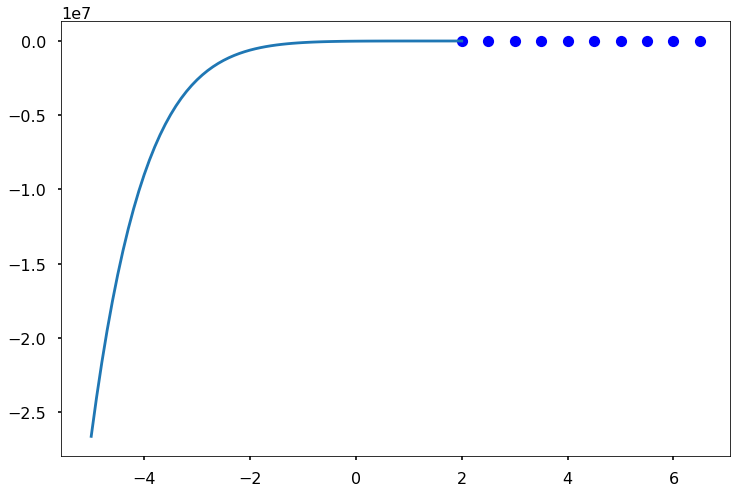

In [67]:
x = array([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5])
y = array([3, 14, 34, 64, 107, 165, 240, 336, 451, 591])

a_s = diferencias_divididas(x, y)[0, :]

x0 = arange(-5, 2.1, .1)
y0 = newton_poly(a_s, x, x0)

plt.figure( figsize =(12,8) )
plt.plot(x ,y, "bo")
plt.plot(x0,y0)
